##### 1st-  data that will be missing
                1.1) continuous data 
                1.2) categorical
               
#### What are different types osf missing data?
   1.  Missing completely at random(MCAR)- there is absolutely no relationship between data missing and any other value.
    
   2.  Missing data not at random(MNAR)- there is absolute relationship between data missing and any other value within the data set.
   
   3.  Missing at random- Men hide their salary, women hide their age


#### Techniques of handling missing values
1. Mean Median Mode replacement
2. Random sample imputation
3. Capturing NAN values with a new feature
4. End of distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

    
    
    
    
    
    
    
    
    


In [1]:
import pandas as pd

import pandas as pd

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [5]:
import numpy as np
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0) ### where cabin is NAN put 1 else put 0

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [16]:
df['Cabin_null'].mean()

0.7710437710437711

In [17]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# 1.Mean Median Mode replacement
when should we apply this- Mean median mode has the assumption that the data is missing completely at random. We solve this by 
replacing the NAN with the most frequent occurence.

In [7]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [8]:
median=df.Age.median()
median

28.0

In [9]:
impute_nan(df,'Age',median)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_median       0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

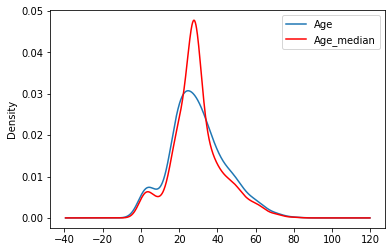

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages/Disadvantages of mean/median imputation
Advantages-Easy to implement(robust to outliers), Faster way to obtain the complete dataset.

Disadvantages-Change or distortion in original variance.

# FEATURE ENGINEERING DAY-2

#### RANDOM SAMPLE IMPUTATION- CONSISTS OF TAKING RANDOM OBSERVATION FROM THE DATASET AND WE USE THIS 
OBSERVATION TO REPLACE THE NAN value. It assumes that data is missing completely at random.

In [14]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    

In [17]:
median=df.Age.median()

In [16]:
median

28.0

In [18]:
impute_nan(df,'Age',median)

In [14]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

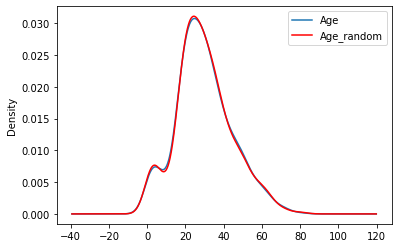

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='red')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# 3. Capturing NAN values with a new feature.
         It works well if data is not missing completely at random.
         Model will come to know that something has happened at that place so, the value is 1 there.

In [17]:
import numpy as np
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [13]:
df['Age_Nan']=np.where(df['Age'].isnull(),1,0)

In [14]:
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [15]:
df['Age'].fillna(df.Age.median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
df.head(50)

,Survived,Age,Fare,Age_median,Age_random,Age-Nan
0,0,22.0,7.2500,22.0,22.00,0
1,1,38.0,71.2833,38.0,38.00,0
2,1,26.0,7.9250,26.0,26.00,0
3,1,35.0,53.1000,35.0,35.00,0
4,0,35.0,8.0500,35.0,35.00,0
5,0,NaN,8.4583,28.0,28.00,1
6,0,54.0,51.8625,54.0,54.00,0
7,0,2.0,21.0750,2.0,2.00,0
8,1,27.0,11.1333,27.0,27.00,0
9,1,14.0,30.0708,14.0,14.00,0


Advantages- Easy to implement, Captures the importance of missing values.
Disadvantages- Creates additional feature(curse of dimensionality)

# 4.End of distribution imputation

In [110]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [111]:
df.Age.mean()+3*df.Age.std()

73.27860964406094

In [112]:
import seaborn as sns
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

c:\users\new u\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

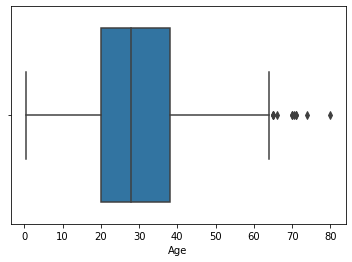

In [114]:
sns.boxplot('Age',data=df)

In [115]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [116]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [117]:

df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

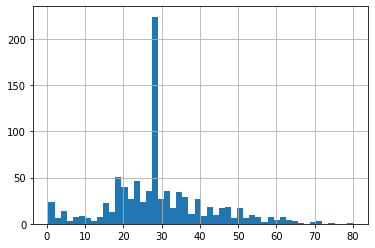

In [118]:
df['Age'].hist(bins=50)


<AxesSubplot:>

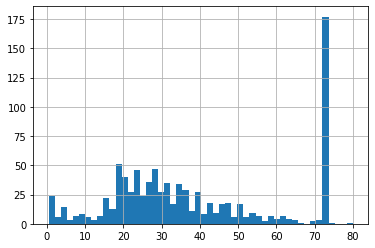

In [120]:

df['Age_end_distribution'].hist(bins=50)

c:\users\new u\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_end_distribution'>

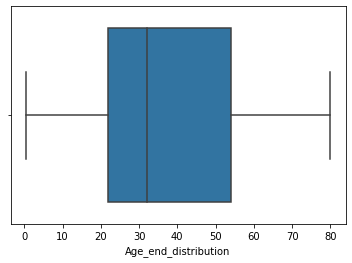

In [121]:
sns.boxplot('Age_end_distribution',data=df)

The outlier has been captured by using end of distribution imputation

In [ ]:
Advantages--Easy to implement
            Captures the importance of missing variable
    
Disadvantages-- Distorts the original distribution of variable.
                If the number of NA is big it will mask true outliers in the distribution
                If the number of NA is small the replaced NA may be considered an outlier and preprocessed in a subsequent fet. eng. 

# Handling categorical variables

#### 1. Frequent values imputation

In [18]:
df=pd.read_csv('loan.csv')

In [19]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [132]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [21]:
df.shape

(1460, 4)

In [135]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [136]:
df.isnull().mean().sort_values(ascending=True) ### Percentage of missing values

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [138]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

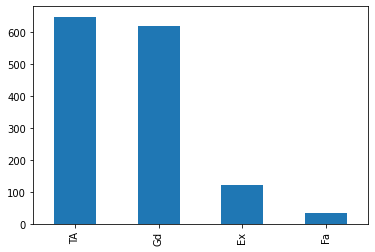

In [142]:
df['BsmtQual'].value_counts().plot.bar()


In [143]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:>

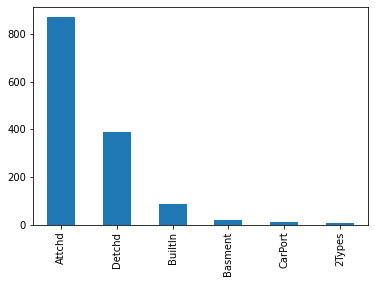

In [144]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

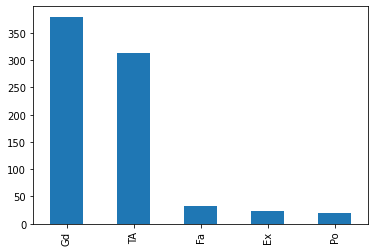

In [145]:
df['FireplaceQu'].value_counts().plot.bar()

In [146]:
df['GarageType'].value_counts().index[0]## To find the most frequent category in column=GarageType

'Attchd'

In [147]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0] ## To replace with most frequent category
    df[variable].fillna(most_frequent_category,inplace=True)

In [148]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [149]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages
         Easy To implement
         Faster way to implement 

#### Disadvantages
       Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
       It distorts the relation of the most frequent label

# 2. Adding a variable to capture NAN

In [150]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [151]:

import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [152]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [156]:
frequent=df['BsmtQual'].value_counts().index[0]
frequent

'TA'

In [157]:

df['BsmtQual'].fillna(frequent,inplace=True)

In [158]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [159]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [160]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [23]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [24]:

df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [25]:
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [26]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [27]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [28]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [29]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Handling categorical variables

#### One hot encoding

In [170]:
import pandas as pd

In [171]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])

In [172]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [173]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [174]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])

In [176]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [177]:
df.dropna(inplace=True)

In [178]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### Onehotencoding with many categories in a feature

In [179]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [181]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [182]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [183]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [184]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [186]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [187]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [188]:
lst_10.append('X1')

In [189]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


# Ordinal number encoding

In [1]:
import datetime
import pandas as pd

In [192]:
today_date=datetime.datetime.today()

In [193]:
today_date

datetime.datetime(2021, 1, 1, 1, 57, 51, 334632)

In [194]:
today_date-datetime.timedelta(3)

datetime.datetime(2020, 12, 29, 1, 57, 51, 334632)

In [2]:
# create a variable with dates, and from that extract the weekday
# I create a list of dates with 20 days difference from today
# and then transform it into a datafame

df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0, 20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df

,day
0,2021-01-03 19:58:16.295220
1,2021-01-02 19:58:16.295220
2,2021-01-01 19:58:16.295220
3,2020-12-31 19:58:16.295220
4,2020-12-30 19:58:16.295220
5,2020-12-29 19:58:16.295220
6,2020-12-28 19:58:16.295220
7,2020-12-27 19:58:16.295220
8,2020-12-26 19:58:16.295220
9,2020-12-25 19:58:16.295220


In [9]:

# extract the week day name

df['day_of_week'] = df['day'].dt.weekday_name
df.head()




AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

,Day
0,2021-01-01 01:57:51.334632
1,2020-12-31 01:57:51.334632
2,2020-12-30 01:57:51.334632
3,2020-12-29 01:57:51.334632
4,2020-12-28 01:57:51.334632


In [199]:
data['weekday']=data['Day'].dt.weekday_name
data.head()

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [8]:
weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(20)

AttributeError: 'DataFrame' object has no attribute 'day_of_week'

In [ ]:
##	day	day_of_week	day_ordinal
0	2019-09-12 12:39:01.344998	Thursday	4
1	2019-09-11 12:39:01.344998	Wednesday	3
2	2019-09-10 12:39:01.344998	Tuesday	2
3	2019-09-09 12:39:01.344998	Monday	1
4	2019-09-08 12:39:01.344998	Sunday	7
5	2019-09-07 12:39:01.344998	Saturday	6
6	2019-09-06 12:39:01.344998	Friday	5
7	2019-09-05 12:39:01.344998	Thursday	4
8	2019-09-04 12:39:01.344998	Wednesday	3
9	2019-09-03 12:39:01.344998	Tuesday	2
10	2019-09-02 12:39:01.344998	Monday	1
11	2019-09-01 12:39:01.344998	Sunday	7
12	2019-08-31 12:39:01.344998	Saturday	6
13	2019-08-30 12:39:01.344998	Friday	5
14	2019-08-29 12:39:01.344998	Thursday	4
15	2019-08-28 12:39:01.344998	Wednesday	3
16	2019-08-27 12:39:01.344998	Tuesday	2
17	2019-08-26 12:39:01.344998	Monday	1
18	2019-08-25 12:39:01.344998	Sunday	7
19	2019-08-24 12:39:01.344998	Saturday	6

#### Ordinal Measurement Advantages

Ordinal measurement is normally used for surveys and questionnaires. Statistical analysis is applied to the
responses once they are collected to place the people who took the survey into the various categories.
The data is then compared to draw inferences and conclusions about the whole surveyed population with regard to the specific
variables. The advantage of using ordinal measurement is ease of collation and categorization. If you ask a survey
question without providing the variables, the answers are likely to be so diverse they cannot be converted to statistics.

With Respect to Machine Learning

Keeps the semantical information of the variable (human readable content)
Straightforward

#### Ordinal Measurement Disadvantages
The same characteristics of ordinal measurement that create its advantages also create certain disadvantages.
The responses are often so narrow in relation to the question that they create or magnify bias that is not factored
into the survey. For example, on the question about satisfaction with the governor, people might be satisfied with his job
performance but upset about a recent sex scandal. The survey question might lead respondents to state their dissatisfaction
about the scandal, in spite of satisfaction with his job performance -- but the statistical conclusion will not differentiate.

With Respect to Machine Learning

Does not add machine learning valuable information

# Target guided ordinal encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [10]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [23]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [24]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [25]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [26]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [27]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [17]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [18]:

ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [19]:
enumerate(ordinal_labels,0)

In [20]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [21]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# Mean Encoding

In [28]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [29]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [30]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [31]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [33]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [35]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict() ### now wherever A will be present I will replace it With 0.46666666667

In [36]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [37]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,mean_ordinal_encode
0,0,M,0.299854
1,1,C,0.593220
2,1,M,0.299854
3,1,C,0.593220
4,0,M,0.299854


###### Advantages
1. It captures information within the labels therefore rendering more predective features
2. It creas a monotonic relationship between variable and the target

##### Disadvantages
1. It prones to overfitting.